<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Data-Prep/blob/master/data_prep_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/data-prep-assignment/tabular-nyctaxi



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/data-prep-assignment/tabular-nyctaxi


In [2]:
%ls


taxi_tripdata.csv  trip_data_dictionary.pdf


In [3]:
import pandas as pd

# Load the dataset
taxi_data = pd.read_csv("taxi_tripdata.csv")

# Display the first few rows
taxi_data.head()

<ipython-input-3-49f0a9b7cb01>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_data = pd.read_csv("taxi_tripdata.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [4]:
# Get basic statistics about the numerical columns
numerical_stats = taxi_data.describe()

# Check for missing values
missing_values = taxi_data.isnull().sum()

# Determine the data types of each column
data_types = taxi_data.dtypes

numerical_stats, missing_values, data_types

(           VendorID    RatecodeID  PULocationID  DOLocationID  \
 count  51173.000000  51173.000000  83691.000000  83691.000000   
 mean       1.851113      1.159244    108.362572    133.270005   
 std        0.355981      0.773260     70.370170     77.216791   
 min        1.000000      1.000000      3.000000      1.000000   
 25%        2.000000      1.000000     56.000000     69.000000   
 50%        2.000000      1.000000     75.000000    132.000000   
 75%        2.000000      1.000000    166.000000    205.000000   
 max        2.000000      5.000000    265.000000    265.000000   
 
        passenger_count  trip_distance   fare_amount         extra  \
 count     51173.000000   83691.000000  83691.000000  83691.000000   
 mean          1.307858     194.354699     20.388305      1.156707   
 std           0.984362    4405.549221     15.583552      1.367897   
 min           0.000000       0.000000   -150.000000     -4.500000   
 25%           1.000000       1.350000      9.000000  

# EDA

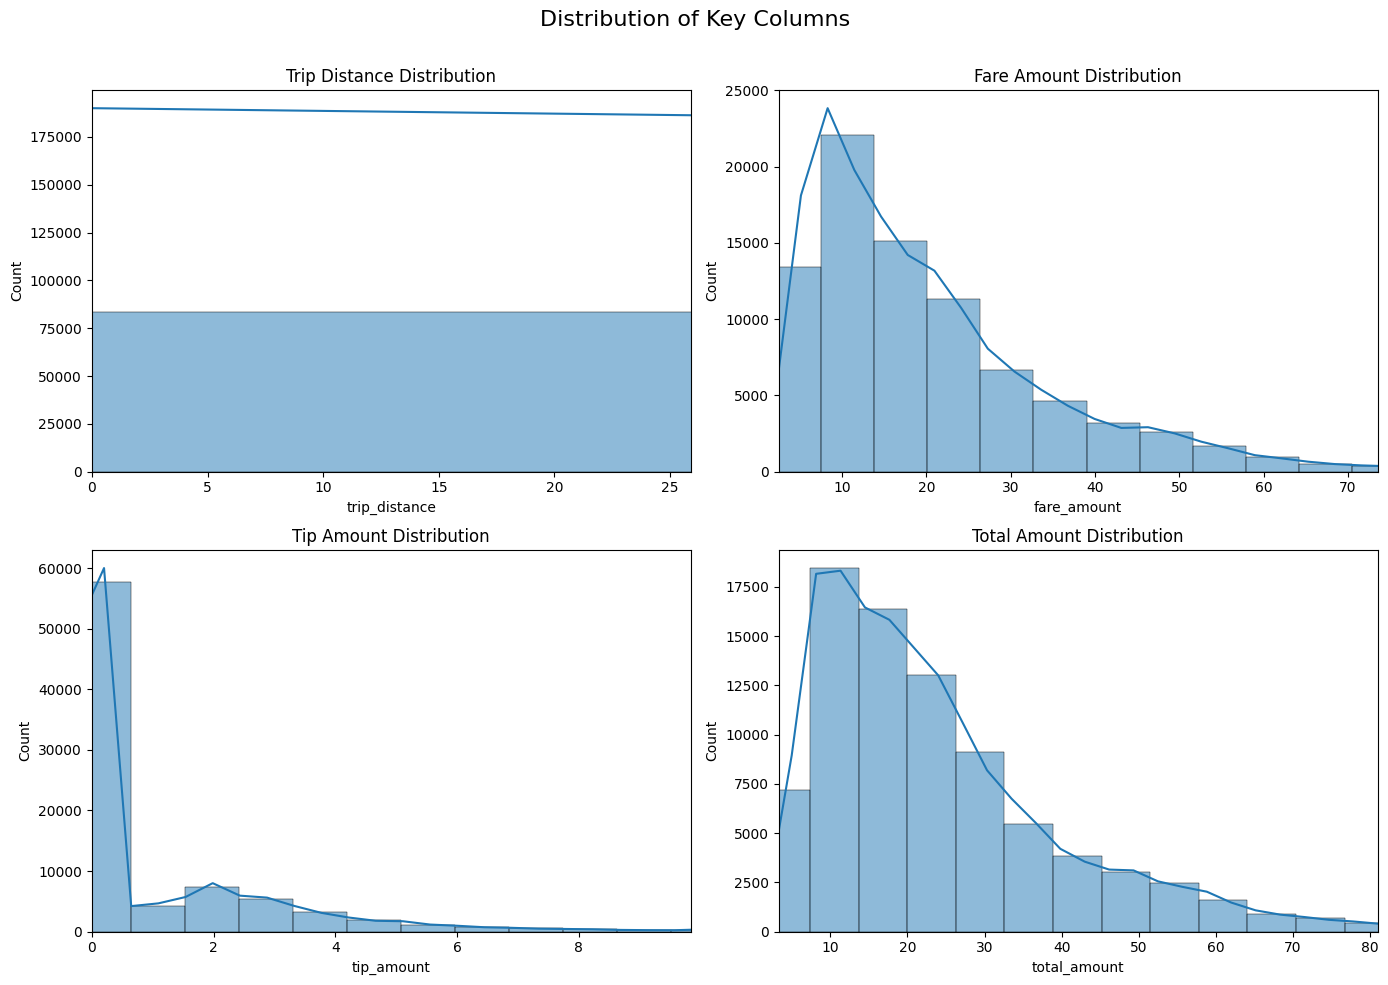

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Key Columns', fontsize=16)

# Plotting the distributions
sns.histplot(taxi_data['trip_distance'], ax=axes[0, 0], kde=True, bins=100)
axes[0, 0].set_title('Trip Distance Distribution')
axes[0, 0].set_xlim(0, taxi_data['trip_distance'].quantile(0.99))  # limit x-axis to 99th percentile for better view

sns.histplot(taxi_data['fare_amount'], ax=axes[0, 1], kde=True, bins=100)
axes[0, 1].set_title('Fare Amount Distribution')
axes[0, 1].set_xlim(taxi_data['fare_amount'].quantile(0.01), taxi_data['fare_amount'].quantile(0.99))

sns.histplot(taxi_data['tip_amount'], ax=axes[1, 0], kde=True, bins=100)
axes[1, 0].set_title('Tip Amount Distribution')
axes[1, 0].set_xlim(0, taxi_data['tip_amount'].quantile(0.99))

sns.histplot(taxi_data['total_amount'], ax=axes[1, 1], kde=True, bins=100)
axes[1, 1].set_title('Total Amount Distribution')
axes[1, 1].set_xlim(taxi_data['total_amount'].quantile(0.01), taxi_data['total_amount'].quantile(0.99))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [6]:
# Convert date-time columns to datetime format
taxi_data['lpep_pickup_datetime'] = pd.to_datetime(taxi_data['lpep_pickup_datetime'])
taxi_data['lpep_dropoff_datetime'] = pd.to_datetime(taxi_data['lpep_dropoff_datetime'])

# Extract features: day of the week and hour of the day
taxi_data['pickup_dayofweek'] = taxi_data['lpep_pickup_datetime'].dt.dayofweek
taxi_data['pickup_hour'] = taxi_data['lpep_pickup_datetime'].dt.hour

taxi_data['dropoff_dayofweek'] = taxi_data['lpep_dropoff_datetime'].dt.dayofweek
taxi_data['dropoff_hour'] = taxi_data['lpep_dropoff_datetime'].dt.hour

# Display the first few rows with the new features
taxi_data[['lpep_pickup_datetime', 'pickup_dayofweek', 'pickup_hour', 'lpep_dropoff_datetime', 'dropoff_dayofweek', 'dropoff_hour']].head()

,lpep_pickup_datetime,pickup_dayofweek,pickup_hour,lpep_dropoff_datetime,dropoff_dayofweek,dropoff_hour
0,2021-07-01 00:30:52,3,0,2021-07-01 00:35:36,3,0
1,2021-07-01 00:25:36,3,0,2021-07-01 01:01:31,3,1
2,2021-07-01 00:05:58,3,0,2021-07-01 00:12:00,3,0
3,2021-07-01 00:41:40,3,0,2021-07-01 00:47:23,3,0
4,2021-07-01 00:51:32,3,0,2021-07-01 00:58:46,3,0


Handle Missing Values

In [7]:
# Drop the 'ehail_fee' column
taxi_data.drop(columns=['ehail_fee'], inplace=True)

# Impute missing values using mode for specified columns
columns_with_missing = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']

for col in columns_with_missing:
    mode_value = taxi_data[col].mode()[0]
    taxi_data[col].fillna(mode_value, inplace=True)

# Check for remaining missing values
remaining_missing = taxi_data.isnull().sum()

remaining_missing[remaining_missing > 0]

Series([], dtype: int64)

Outliers


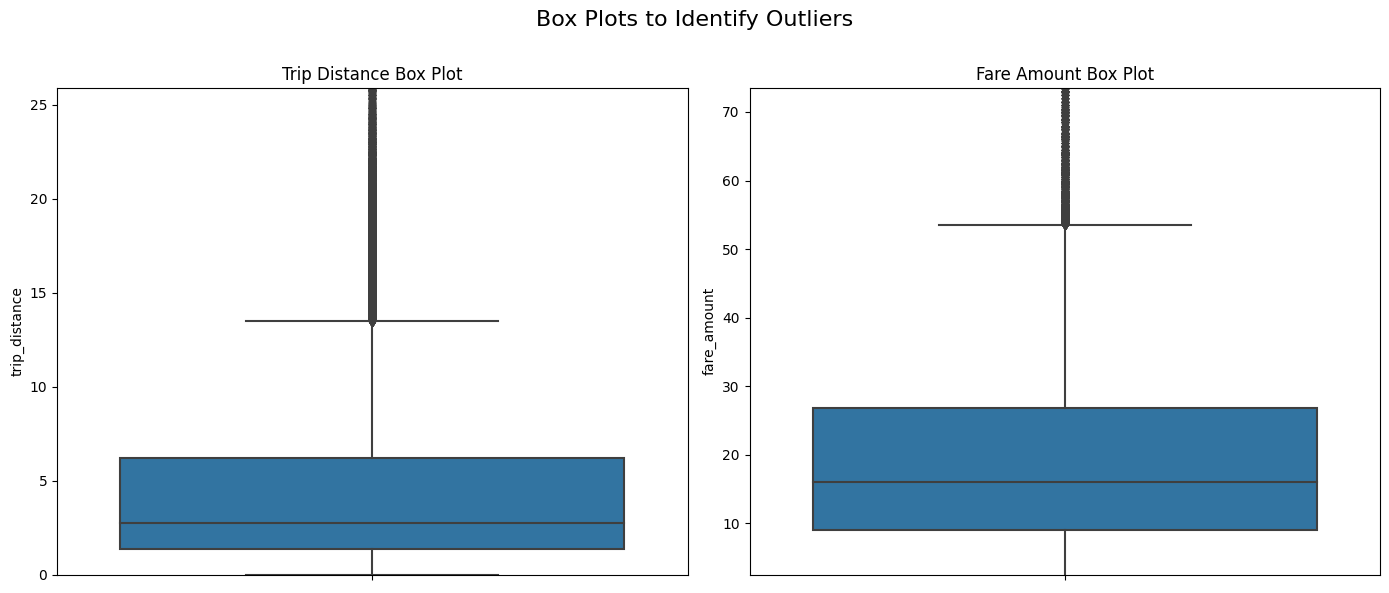

In [8]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Box Plots to Identify Outliers', fontsize=16)

# Plotting the box plots
sns.boxplot(y=taxi_data['trip_distance'], ax=axes[0])
axes[0].set_title('Trip Distance Box Plot')
axes[0].set_ylim(0, taxi_data['trip_distance'].quantile(0.99))  # limit y-axis to 99th percentile for better view

sns.boxplot(y=taxi_data['fare_amount'], ax=axes[1])
axes[1].set_title('Fare Amount Box Plot')
axes[1].set_ylim(taxi_data['fare_amount'].quantile(0.01), taxi_data['fare_amount'].quantile(0.99))

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Cap Outliers

In [9]:
# Cap the values at the 99th percentile for 'trip_distance' and 'fare_amount'
trip_distance_cap = taxi_data['trip_distance'].quantile(0.99)
fare_amount_cap = taxi_data['fare_amount'].quantile(0.99)

taxi_data['trip_distance'] = taxi_data['trip_distance'].clip(upper=trip_distance_cap)
taxi_data['fare_amount'] = taxi_data['fare_amount'].clip(upper=fare_amount_cap)

# Display the statistics of these columns after capping
taxi_data[['trip_distance', 'fare_amount']].describe()

,trip_distance,fare_amount
count,83691.000000,83691.000000
mean,4.774541,20.261124
std,5.266041,14.929596
min,0.000000,-150.000000
25%,1.350000,9.000000
50%,2.760000,16.000000
75%,6.200000,26.830000
max,25.890000,73.500000


Feature Engineering

In [10]:
# 1. Duration of Trip
taxi_data['trip_duration'] = (taxi_data['lpep_dropoff_datetime'] - taxi_data['lpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# 2. Speed (miles per hour)
taxi_data['average_speed'] = taxi_data['trip_distance'] / (taxi_data['trip_duration'] / 60)  # mph

# 3. Time-based Features
taxi_data['is_weekend'] = taxi_data['pickup_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)  # 5 and 6 correspond to Saturday and Sunday
taxi_data['morning_rush'] = taxi_data['pickup_hour'].apply(lambda x: 1 if 6 <= x <= 9 else 0)
taxi_data['evening_rush'] = taxi_data['pickup_hour'].apply(lambda x: 1 if 16 <= x <= 19 else 0)

# 4. Fare per Mile
taxi_data['fare_per_mile'] = taxi_data['fare_amount'] / taxi_data['trip_distance']
taxi_data['fare_per_mile'] = taxi_data['fare_per_mile'].replace([float('inf'), -float('inf')], 0)  # Handle division by zero

# 5. Tip Percentage
taxi_data['tip_percentage'] = (taxi_data['tip_amount'] / taxi_data['fare_amount']) * 100
taxi_data['tip_percentage'] = taxi_data['tip_percentage'].replace([float('inf'), -float('inf')], 0)  # Handle division by zero

# Display the first few rows with the new features
taxi_data[['trip_duration', 'average_speed', 'is_weekend', 'morning_rush', 'evening_rush', 'fare_per_mile', 'tip_percentage']].head()

,trip_duration,average_speed,is_weekend,morning_rush,evening_rush,fare_per_mile,tip_percentage
0,4.733333,15.211268,0,0,0,5.000000,0.0
1,35.916667,22.869606,0,0,0,3.067933,0.0
2,6.033333,9.447514,0,0,0,6.842105,36.0
3,5.716667,13.014577,0,0,0,5.241935,0.0
4,7.233333,9.124424,0,0,0,6.363636,0.0


Encode Categorical Variables

In [11]:
# One-hot encoding for 'store_and_fwd_flag' column
taxi_data = pd.get_dummies(taxi_data, columns=['store_and_fwd_flag'], drop_first=True, prefix='flag')

# Display the first few rows with the new feature
taxi_data[['flag_Y']].head()

,flag_Y
0,0
1,0
2,0
3,0
4,0


# Modeling


Split Dataset

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = taxi_data.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'fare_amount', 'total_amount', 'tip_amount'])
y = taxi_data['fare_amount']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((66952, 25), (16739, 25))

Scale Numerical Values


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# Replace infinite values with NaN
columns_to_check = ['average_speed', 'fare_per_mile', 'tip_percentage']
for col in columns_to_check:
    taxi_data[col].replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the median of the column
for col in columns_to_check:
    median_value = taxi_data[col].median()
    taxi_data[col].fillna(median_value, inplace=True)

# Re-attempt the standardization
X_train = taxi_data.loc[y_train.index].drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'fare_amount', 'total_amount', 'tip_amount'])
X_test = taxi_data.loc[y_test.index].drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'fare_amount', 'total_amount', 'tip_amount'])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the mean and standard deviation of the scaled training data (for the first feature as an example)
mean_scaled = X_train_scaled[:, 0].mean()
std_scaled = X_train_scaled[:, 0].std()

mean_scaled, std_scaled

(-1.2756487758149725e-16, 1.0000000000000002)

Train Linear Reg

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mae, rmse

(4.222881284195911, 6.9025065490014095)

Train Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

mae_rf, rmse_rf

(0.3887559392237691, 2.0028347676307763)

Train Gradient Boost

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize a Gradient Boosting model with reduced complexity
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42)

# Train the model on the sampled and scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

mae_gb, rmse_gb

(1.016579729638838, 2.4783739287250715)

Compute Ensemble Prediction

In [18]:
# Compute ensemble predictions by averaging predictions of linear regression and gradient boosting models
ensemble_predictions = (y_pred + y_pred_gb) / 2

# Evaluate the ensemble
mae_ensemble = mean_absolute_error(y_test, ensemble_predictions)
rmse_ensemble = mean_squared_error(y_test, ensemble_predictions, squared=False)

mae_ensemble, rmse_ensemble

(2.434483209229989, 4.172653535502963)